Es würde Sinn machen die Definition von iid auf einzelne Zeitreihen zu beziehen:
- independent: Zeitreihe x1 ist nicht von Zeitreihe y1,y2,y3 aber von x2,x3 abhängig -> das wäre interessant zu sehen, ob bei einem Versuch ohne Clustering das MLP Hinweise auf einen Trend aus einer eigentlich nicht abhängigen Zeitreihe nutzen kann um bessere Ergebnisse zu erzielen -> allerdings schwer zu sagen ob es dann daran lag oder allgmein an mehr Wissen
- identical distributed: Zeitreihen können nur bei gleichem Cluster und gleicher Peak id sein

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import ccf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Amount of days
days = 365

# Amount of timeslots per day
timeslots = 48

# Seasonal scalar
seasonal = (np.cos(np.linspace(0,4*np.pi,365*2))+2)/3

nonIID = pd.DataFrame()

## Non i.i.d

In [3]:
for i in range(0,3):
    f_t = np.array([])
    # Parameter der Gaußglocke per Haushalt
    a = random.uniform(0.2,1)*seasonal       # Höhe der Glocke
    mu = 19.0                                   # Peak der Glocke bei Zeitslot
    sigma = 4.0*seasonal                        # Standardabweichung
    for j in range(0,365*2):
        f_t = np.append(f_t, [a[j] * np.exp(- (np.arange(timeslots) - mu)**2 / (2 * sigma[j]**2))])
    nonIID[i] = f_t
for i in range(3,6):
    f_t = np.array([])
    # Parameter der Gaußglocke per Haushalt
    a = random.uniform(0.2,1)*seasonal       # Höhe der Glocke
    mu = 23.0                                   # Peak der Glocke bei Zeitslot
    sigma = 4.0*seasonal                        # Standardabweichung
    for j in range(0,365*2):
        f_t = np.append(f_t, [a[j] * np.exp(- (np.arange(timeslots) - mu)**2 / (2 * sigma[j]**2))])
    nonIID[i] = f_t
for i in range(6,10):
    f_t = np.array([])
    # Parameter der Gaußglocke per Haushalt
    a = random.uniform(0.2,1)*seasonal       # Höhe der Glocke
    mu = 27.0                                   # Peak der Glocke bei Zeitslot
    sigma = 4.0*seasonal                        # Standardabweichung
    for j in range(0,365*2):
        f_t = np.append(f_t, [a[j] * np.exp(- (np.arange(timeslots) - mu)**2 / (2 * sigma[j]**2))])
    nonIID[i] = f_t

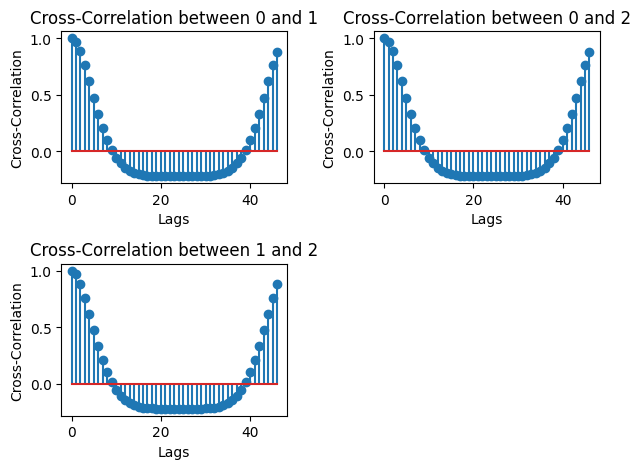

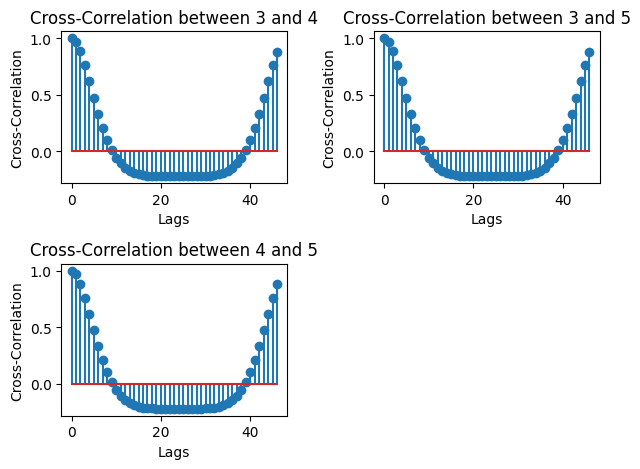

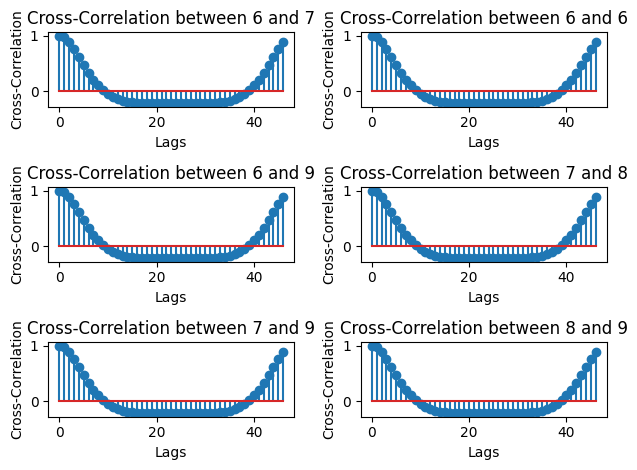

,0,1,2,3,4,5,6,7,8,9
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04
mean,2.503846e-02,1.013415e-01,5.455514e-02,6.796461e-02,1.039148e-01,6.013866e-02,4.896108e-02,5.243499e-02,2.698286e-02,1.045859e-01
std,5.318849e-02,2.152768e-01,1.158899e-01,1.443753e-01,2.207433e-01,1.277508e-01,1.040066e-01,1.113861e-01,5.731892e-02,2.221689e-01
min,0.000000e+00,4.224706e-97,1.634264e-97,9.578399e-72,1.464494e-71,8.475471e-72,1.415708e-90,1.516156e-90,7.802085e-91,3.024098e-90
25%,2.256651e-13,9.133646e-13,4.916913e-13,4.353798e-12,6.656762e-12,3.852470e-12,9.801156e-13,1.049657e-12,5.401499e-13,2.093628e-12
50%,6.916592e-06,2.799444e-05,1.507024e-05,1.877446e-05,2.870530e-05,1.661263e-05,1.352495e-05,1.448457e-05,7.453711e-06,2.889068e-05
75%,1.323258e-02,5.355799e-02,2.883186e-02,3.591863e-02,5.491797e-02,3.178269e-02,2.587545e-02,2.771138e-02,1.426018e-02,5.527263e-02
max,2.394057e-01,9.689784e-01,5.216299e-01,6.498448e-01,9.935835e-01,5.750168e-01,4.681422e-01,5.013580e-01,2.579971e-01,1.000000e+00


In [4]:
scaler = MinMaxScaler()
flat_data = nonIID.values.flatten().reshape(-1, 1)
scaled_flat_data = scaler.fit_transform(flat_data)
nonIID = pd.DataFrame(scaled_flat_data.reshape(17520*2,10))
     
cross_corr_01 = ccf(nonIID[0], nonIID[1], nlags=timeslots-1)
cross_corr_02 = ccf(nonIID[0], nonIID[2], nlags=timeslots-1)
cross_corr_12 = ccf(nonIID[1], nonIID[2], nlags=timeslots-1)

cross_corr_34 = ccf(nonIID[3], nonIID[4], nlags=timeslots-1)
cross_corr_35 = ccf(nonIID[3], nonIID[5], nlags=timeslots-1)
cross_corr_45 = ccf(nonIID[4], nonIID[5], nlags=timeslots-1)

cross_corr_67 = ccf(nonIID[6], nonIID[7], nlags=timeslots-1)
cross_corr_68 = ccf(nonIID[6], nonIID[8], nlags=timeslots-1)
cross_corr_69 = ccf(nonIID[6], nonIID[9], nlags=timeslots-1)
cross_corr_78 = ccf(nonIID[7], nonIID[8], nlags=timeslots-1)
cross_corr_79 = ccf(nonIID[7], nonIID[9], nlags=timeslots-1)
cross_corr_89 = ccf(nonIID[8], nonIID[9], nlags=timeslots-1)

plt.subplot(2, 2, 1)
plt.stem(cross_corr_01)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 1")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_02)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 2")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_12)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 1 and 2")
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
plt.stem(cross_corr_34)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 4")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_35)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 5")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_45)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 4 and 5")
plt.tight_layout()
plt.show()

plt.subplot(3, 2, 1)
plt.stem(cross_corr_67)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 7")
plt.subplot(3, 2, 2)
plt.stem(cross_corr_68)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 6")
plt.subplot(3, 2, 3)
plt.stem(cross_corr_69)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 9")
plt.tight_layout()
plt.subplot(3, 2, 4)
plt.stem(cross_corr_78)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 8")
plt.subplot(3, 2, 5)
plt.stem(cross_corr_79)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 9")
plt.subplot(3, 2, 6)
plt.stem(cross_corr_89)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 8 and 9")
plt.tight_layout()
plt.show()
nonIID.describe()

In [5]:
nonIID.to_csv("nonIID.csv", index=False)

## Transition

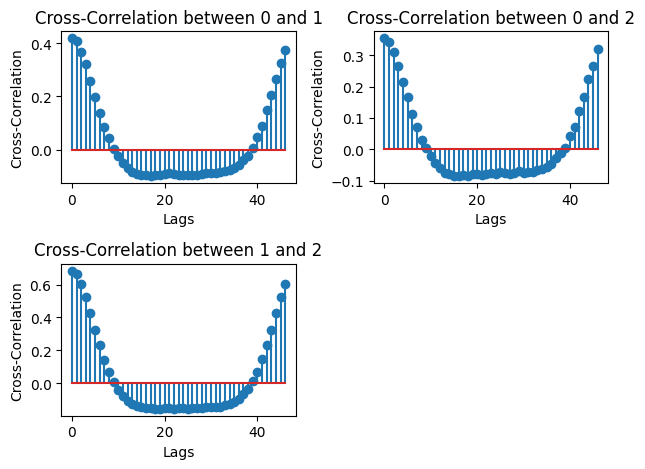

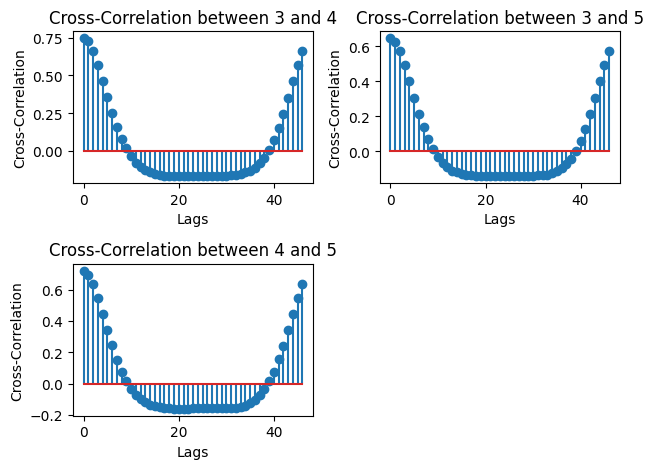

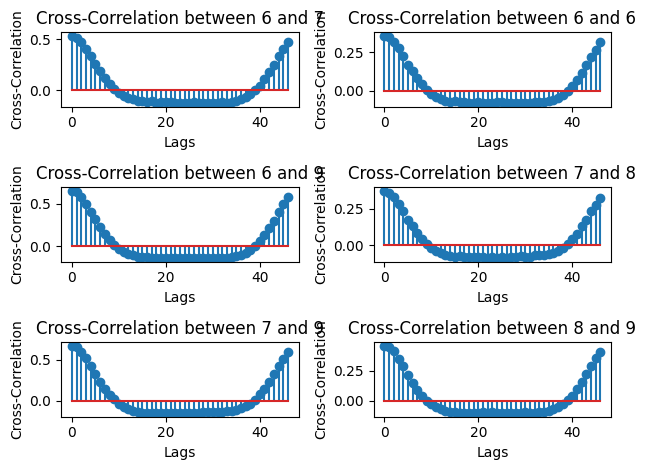

,0,1,2,3,4,5,6,7,8,9
count,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04,3.504000e+04
mean,2.503846e-02,1.013415e-01,5.455514e-02,6.796461e-02,1.039148e-01,6.013866e-02,4.896108e-02,5.243499e-02,2.698286e-02,1.045859e-01
std,5.318849e-02,2.152768e-01,1.158899e-01,1.443753e-01,2.207433e-01,1.277508e-01,1.040066e-01,1.113861e-01,5.731892e-02,2.221689e-01
min,0.000000e+00,4.224706e-97,1.634264e-97,9.578399e-72,1.464494e-71,8.475471e-72,1.415708e-90,1.516156e-90,7.802085e-91,3.024098e-90
25%,2.256651e-13,9.133646e-13,4.916913e-13,4.353798e-12,6.656762e-12,3.852470e-12,9.801156e-13,1.049657e-12,5.401499e-13,2.093628e-12
50%,6.916592e-06,2.799444e-05,1.507024e-05,1.877446e-05,2.870530e-05,1.661263e-05,1.352495e-05,1.448457e-05,7.453711e-06,2.889068e-05
75%,1.323258e-02,5.355799e-02,2.883186e-02,3.591863e-02,5.491797e-02,3.178269e-02,2.587545e-02,2.771138e-02,1.426018e-02,5.527263e-02
max,2.394057e-01,9.689784e-01,5.216299e-01,6.498448e-01,9.935835e-01,5.750168e-01,4.681422e-01,5.013580e-01,2.579971e-01,1.000000e+00


In [6]:
noise = np.random.normal(0.5, 0.1, nonIID.shape)
transition = nonIID + noise

scaler = MinMaxScaler()
flat_data = transition.values.flatten().reshape(-1, 1)
scaled_flat_data = scaler.fit_transform(flat_data)
transition = pd.DataFrame(scaled_flat_data.reshape(17520*2,10))

cross_corr_01 = ccf(transition[0], transition[1], nlags=timeslots-1)
cross_corr_02 = ccf(transition[0], transition[2], nlags=timeslots-1)
cross_corr_12 = ccf(transition[1], transition[2], nlags=timeslots-1)

cross_corr_34 = ccf(transition[3], transition[4], nlags=timeslots-1)
cross_corr_35 = ccf(transition[3], transition[5], nlags=timeslots-1)
cross_corr_45 = ccf(transition[4], transition[5], nlags=timeslots-1)

cross_corr_67 = ccf(transition[6], transition[7], nlags=timeslots-1)
cross_corr_68 = ccf(transition[6], transition[8], nlags=timeslots-1)
cross_corr_69 = ccf(transition[6], transition[9], nlags=timeslots-1)
cross_corr_78 = ccf(transition[7], transition[8], nlags=timeslots-1)
cross_corr_79 = ccf(transition[7], transition[9], nlags=timeslots-1)
cross_corr_89 = ccf(transition[8], transition[9], nlags=timeslots-1)

plt.subplot(2, 2, 1)
plt.stem(cross_corr_01)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 1")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_02)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 2")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_12)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 1 and 2")
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
plt.stem(cross_corr_34)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 4")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_35)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 5")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_45)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 4 and 5")
plt.tight_layout()
plt.show()

plt.subplot(3, 2, 1)
plt.stem(cross_corr_67)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 7")
plt.subplot(3, 2, 2)
plt.stem(cross_corr_68)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 6")
plt.subplot(3, 2, 3)
plt.stem(cross_corr_69)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 9")
plt.tight_layout()
plt.subplot(3, 2, 4)
plt.stem(cross_corr_78)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 8")
plt.subplot(3, 2, 5)
plt.stem(cross_corr_79)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 9")
plt.subplot(3, 2, 6)
plt.stem(cross_corr_89)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 8 and 9")
plt.tight_layout()
plt.show()
nonIID.describe()

In [7]:
transition.to_csv("transition.csv", index=False)

## i.i.d

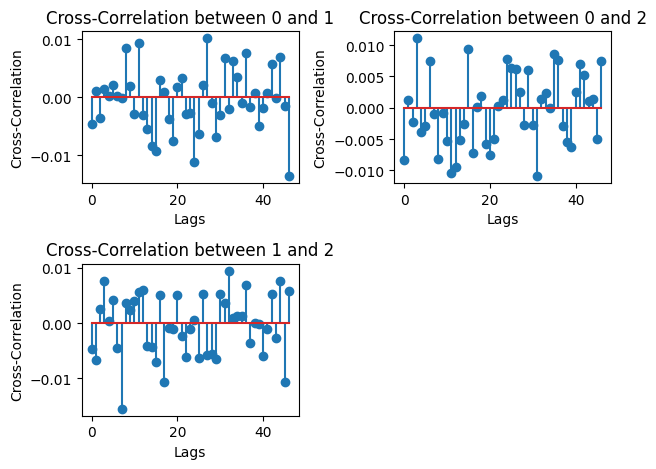

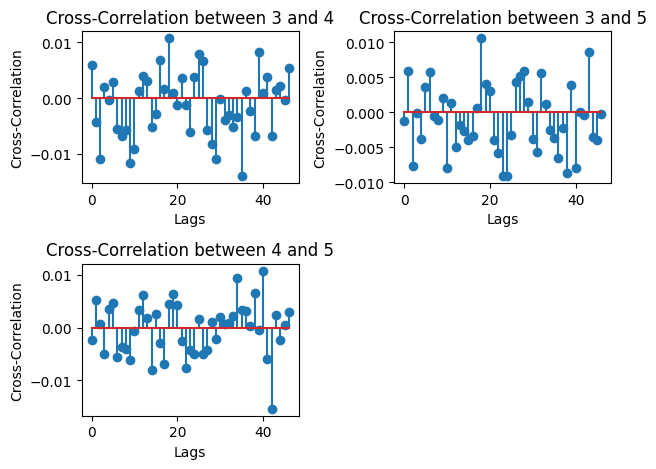

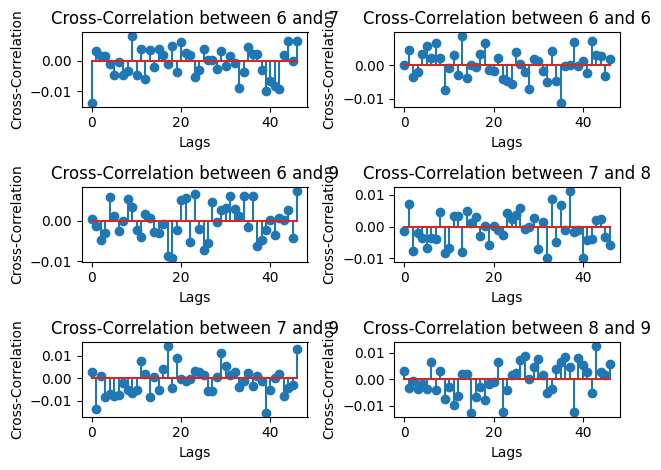

,0,1,2,3,4,5,6,7,8,9
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,0.482018,0.482929,0.482528,0.483227,0.482764,0.482462,0.482030,0.482373,0.482207,0.482261
std,0.107230,0.107088,0.107398,0.107136,0.107891,0.108233,0.107326,0.107413,0.107611,0.107141
min,0.046789,0.046403,0.000000,0.042474,0.053777,0.041690,0.078453,0.039144,0.063717,0.006464
25%,0.409843,0.410247,0.410269,0.409961,0.410015,0.410067,0.409691,0.409859,0.408851,0.410178
50%,0.483041,0.482386,0.482313,0.482765,0.482811,0.482207,0.481321,0.482440,0.481871,0.482066
75%,0.554309,0.555900,0.554559,0.555405,0.555195,0.555120,0.554078,0.554962,0.555026,0.555012
max,0.906058,0.909551,1.000000,0.916040,0.926402,0.942841,0.929729,0.948967,0.889316,0.916288


In [8]:
noise = np.random.normal(0.5, 0.1, nonIID.shape)
IID = nonIID + 1000*noise

scaler = MinMaxScaler()
flat_data = IID.values.flatten().reshape(-1, 1)
scaled_flat_data = scaler.fit_transform(flat_data)
IID = pd.DataFrame(scaled_flat_data.reshape(17520*2,10))

cross_corr_01 = ccf(IID[0], IID[1], nlags=timeslots-1)
cross_corr_02 = ccf(IID[0], IID[2], nlags=timeslots-1)
cross_corr_12 = ccf(IID[1], IID[2], nlags=timeslots-1)

cross_corr_34 = ccf(IID[3], IID[4], nlags=timeslots-1)
cross_corr_35 = ccf(IID[3], IID[5], nlags=timeslots-1)
cross_corr_45 = ccf(IID[4], IID[5], nlags=timeslots-1)

cross_corr_67 = ccf(IID[6], IID[7], nlags=timeslots-1)
cross_corr_68 = ccf(IID[6], IID[8], nlags=timeslots-1)
cross_corr_69 = ccf(IID[6], IID[9], nlags=timeslots-1)
cross_corr_78 = ccf(IID[7], IID[8], nlags=timeslots-1)
cross_corr_79 = ccf(IID[7], IID[9], nlags=timeslots-1)
cross_corr_89 = ccf(IID[8], IID[9], nlags=timeslots-1)

plt.subplot(2, 2, 1)
plt.stem(cross_corr_01)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 1")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_02)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 0 and 2")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_12)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 1 and 2")
plt.tight_layout()
plt.show()

plt.subplot(2, 2, 1)
plt.stem(cross_corr_34)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 4")
plt.subplot(2, 2, 2)
plt.stem(cross_corr_35)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 3 and 5")
plt.subplot(2, 2, 3)
plt.stem(cross_corr_45)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 4 and 5")
plt.tight_layout()
plt.show()

plt.subplot(3, 2, 1)
plt.stem(cross_corr_67)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 7")
plt.subplot(3, 2, 2)
plt.stem(cross_corr_68)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 6")
plt.subplot(3, 2, 3)
plt.stem(cross_corr_69)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 6 and 9")
plt.tight_layout()
plt.subplot(3, 2, 4)
plt.stem(cross_corr_78)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 8")
plt.subplot(3, 2, 5)
plt.stem(cross_corr_79)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 7 and 9")
plt.subplot(3, 2, 6)
plt.stem(cross_corr_89)
plt.xlabel("Lags")
plt.ylabel("Cross-Correlation")
plt.title("Cross-Correlation between 8 and 9")
plt.tight_layout()
plt.show()
IID.describe()

In [9]:
IID.to_csv("iid.csv", index=False)